In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data files
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [ ]:
#Analysis on the Matches data set which will give overview on the entire IPL across seasons

In [3]:
#First 5 rows
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Size of the dataset
matches.shape

(636, 18)

In [5]:
#No of Teams involved in IPL so far
matches.team1.drop_duplicates()

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
6            Kolkata Knight Riders
8                 Delhi Daredevils
10                 Kings XI Punjab
60             Chennai Super Kings
61                Rajasthan Royals
63                 Deccan Chargers
236           Kochi Tuskers Kerala
249                  Pune Warriors
581        Rising Pune Supergiants
Name: team1, dtype: object

In [23]:
#As we know that 'Rising Pune Supergiant' and 'Rising Pune Supergiants' are the same team, 
#could be aa data issue where 's' could have  been missed
#we must hanle this before proceeding with analysis
matches.replace(to_replace ="Rising Pune Supergiant", 
                 value ="Rising Pune Supergiants",inplace=True) 

In [45]:
#Winning team stats across differnt seasons(2008-2017) with number of wins
[matches.season.groupby(matches.winner).count()]

[winner
 Chennai Super Kings            79
 Deccan Chargers                29
 Delhi Daredevils               62
 Gujarat Lions                  13
 Kings XI Punjab                70
 Kochi Tuskers Kerala            6
 Kolkata Knight Riders          77
 Mumbai Indians                 92
 Pune Warriors                  12
 Rajasthan Royals               63
 Rising Pune Supergiants        15
 Royal Challengers Bangalore    73
 Sunrisers Hyderabad            42
 Name: season, dtype: int64]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

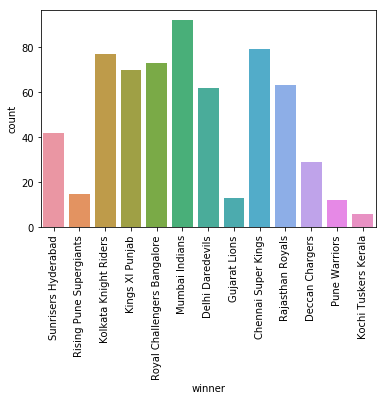

In [39]:
#plot of the above stat
sns.countplot(x='winner',data=matches)
plt.xticks(rotation='vertical')

In [40]:
temp_df = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


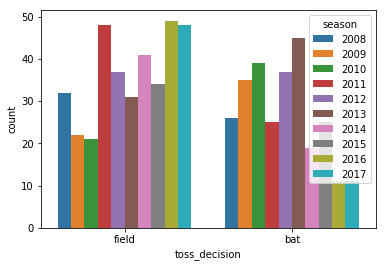

In [50]:
#Toss Percentage across seasons
sns.countplot(x='toss_decision',data=matches,hue='season')

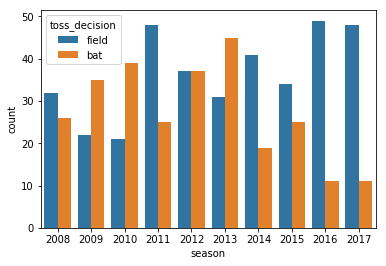

In [52]:
sns.countplot(x='season',data=matches,hue='toss_decision')

In [57]:
#Function to label in plots
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

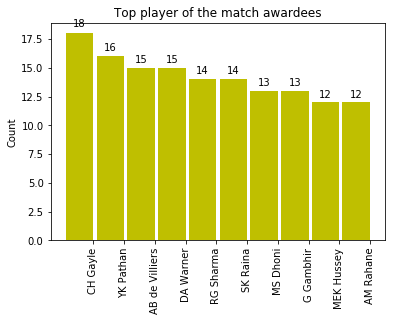

In [59]:
temp_series = matches.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

In [60]:
#Analysis with the deliveries dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [116]:
#Most runs batsman
print(deliveries.batsman_runs.groupby(deliveries.batsman))
temp = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs',ascending=False)
temp.head(1)

,batsman,batsman_runs
374,SK Raina,4548


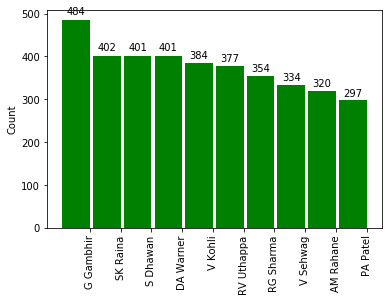

In [131]:
#Player with most Boundaries
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['batsman_runs']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
autolabel(rects)
plt.show()

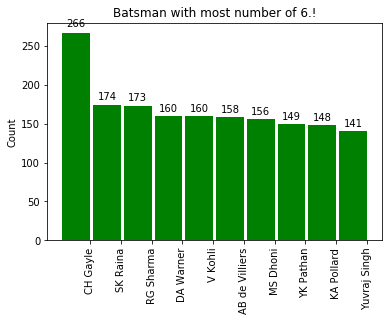

In [133]:
#Player with most 6
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['batsman_runs']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of 6.!")
autolabel(rects)
plt.show()

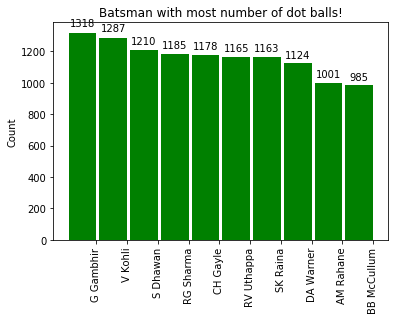

In [134]:
#Player with most dotballs
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['batsman_runs']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls!")
autolabel(rects)
plt.show()

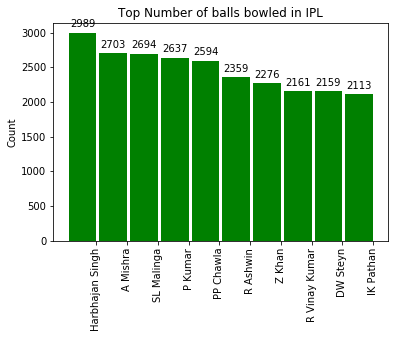

In [163]:
#Top Number of Balls Bowled by Bowler
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['ball']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Number of balls bowled in IPL")
autolabel(rects)
plt.show()

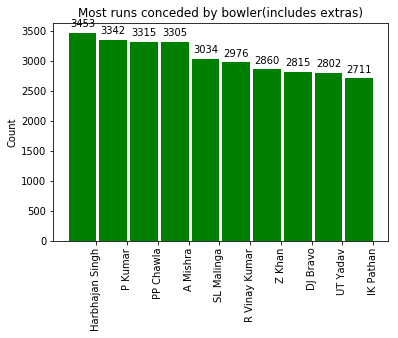

In [146]:
#Bowler who has given most runs(includes extras)
temp_df = deliveries.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values(by='total_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['total_runs']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Most runs conceded by bowler(includes extras)")
autolabel(rects)
plt.show()

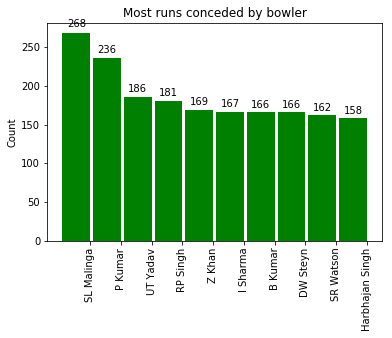

In [144]:
#Bowler who has given most extra runs
temp_df = deliveries.groupby('bowler')['extra_runs'].agg('sum').reset_index().sort_values(by='extra_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['extra_runs']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Most extra runs conceded by bowler")
autolabel(rects)
plt.show()

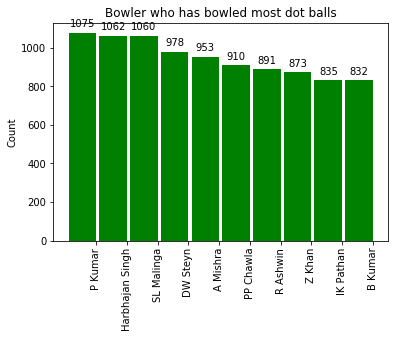

In [148]:
#Bowler who has bowled most dot balls
temp_df = deliveries.groupby('bowler')['total_runs'].agg(lambda x : (x==0).sum()).reset_index().sort_values(by='total_runs',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['total_runs']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowler who has bowled most dot balls")
autolabel(rects)
plt.show()

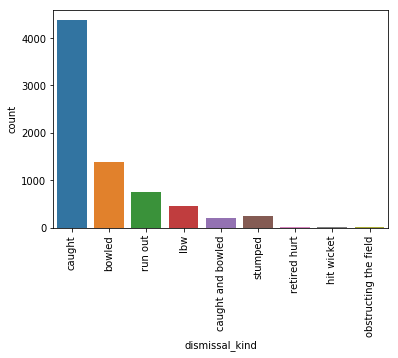

In [150]:
#Batsamn dismissal type
sns.countplot(x='dismissal_kind',data=deliveries)
plt.xticks(rotation='vertical')
plt.show()

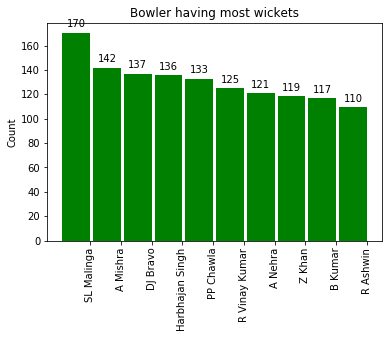

In [160]:
#Bowler having most wickets (calculated based on batsman dismissed, also includes run outs)
temp_df = deliveries['player_dismissed'].notnull().groupby(deliveries['bowler']).agg('sum').reset_index().sort_values(by='player_dismissed',ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
fig,ax = plt.subplots()
rects = ax.bar(ind,np.array(temp_df['player_dismissed']),width=0.9,color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowler having most wickets")
autolabel(rects)
plt.show()